## Cleaning Google App Store Data
ref: https://www.kaggle.com/datasets/lava18/google-play-store-apps
The dataset is cleaned here AppStoreDataCleaning.ipynb
Web scraped data of 10k Play Store apps for analysing the Android market.
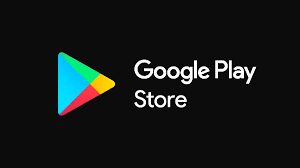
### Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

### Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline


## Read and Load data

In [2]:
df=pd.read_csv('googleappstore_cleandata.csv')

In [3]:
df.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated,Current_Ver,Android_Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up


## Exploratory Data Analysis

In [4]:
df.shape

(8871, 13)

In [5]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content_Rating', 'Last_Updated',
       'Current_Ver', 'Android_Ver'],
      dtype='object')

In [6]:
df=df.drop('Unnamed: 0', axis=1)

In [9]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size                int64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [10]:
df.shape

(8871, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8871 non-null   object 
 1   Category        8871 non-null   object 
 2   Rating          8871 non-null   float64
 3   Reviews         8871 non-null   int64  
 4   Size            8871 non-null   int64  
 5   Installs        8871 non-null   int64  
 6   Type            8871 non-null   object 
 7   Price           8871 non-null   float64
 8   Content_Rating  8871 non-null   object 
 9   Last_Updated    8871 non-null   object 
 10  Current_Ver     8871 non-null   object 
 11  Android_Ver     8871 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 831.8+ KB


In [12]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8871.000000,8.871000e+03,8871.000000,8.871000e+03,8871.000000
mean,4.187127,4.733339e+05,45.682561,1.651205e+07,0.963920
std,0.522311,2.908104e+06,87.215382,8.647084e+07,16.208348
min,1.000000,1.000000e+00,0.000000,5.000000e+00,0.000000
25%,4.000000,1.645000e+02,14.000000,1.000000e+04,0.000000
50%,4.300000,4.722000e+03,29.000000,5.000000e+05,0.000000
75%,4.500000,7.129850e+04,54.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,994.000000,1.000000e+09,400.000000


# Performing univariate analysis

## Boxplot for Price
### Are there any outliers? Think about the price of usual apps on Play Store.

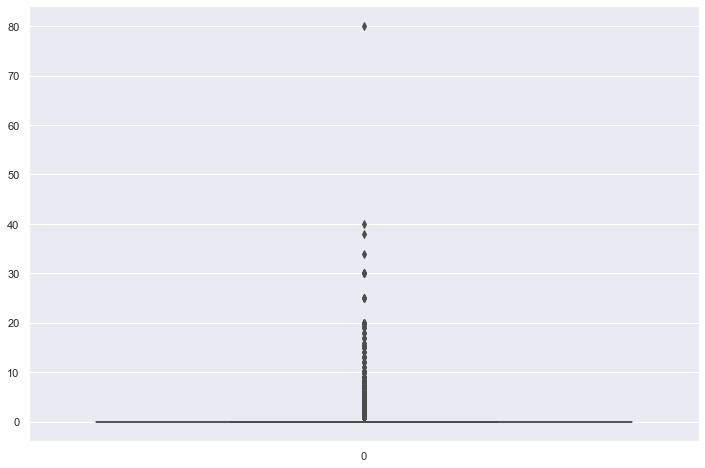

In [29]:
#plt.figure(figsize=(16,9))
#plt.boxplot(df['Price'])
#sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=df['Price'])
plt.show()

## Boxplot for Reviews

### Are there any apps with very high number of reviews? Do the values seem right?



<AxesSubplot:>

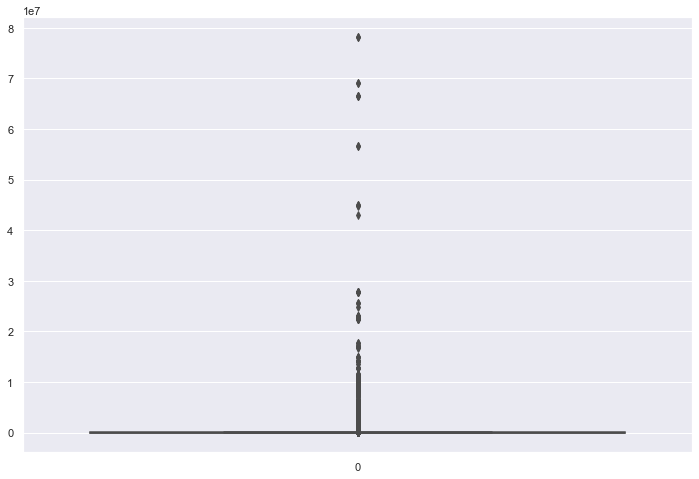

In [14]:
sns.boxplot(data=df['Reviews'])

## Histogram for Rating

### How are the ratings distributed? Is it more toward higher ratings?



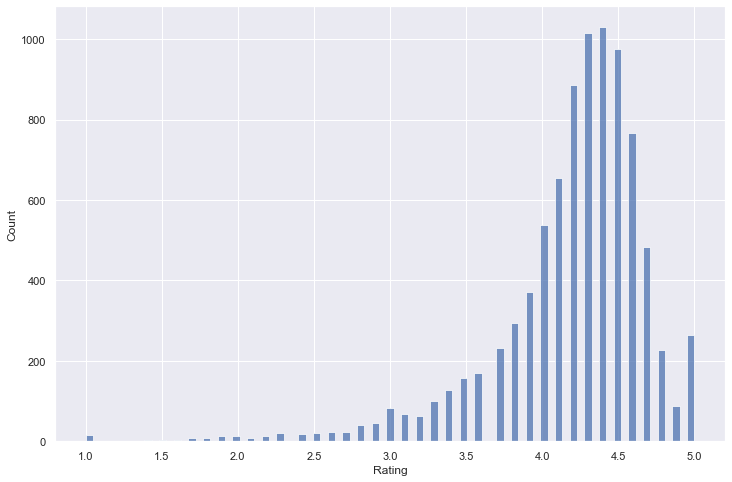

The skewness of this distribution is -1.826506912748597
The Median of this distribution 4.3 is greater than mean 4.187126592266946 of this distribution


In [15]:
sns.histplot(df['Rating'])
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))

In [16]:
df['Rating'].describe()

count    8871.000000
mean        4.187127
std         0.522311
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [17]:
df['Rating'].mode()

0    4.4
Name: Rating, dtype: float64

Since mode > median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

## Histogram for Size

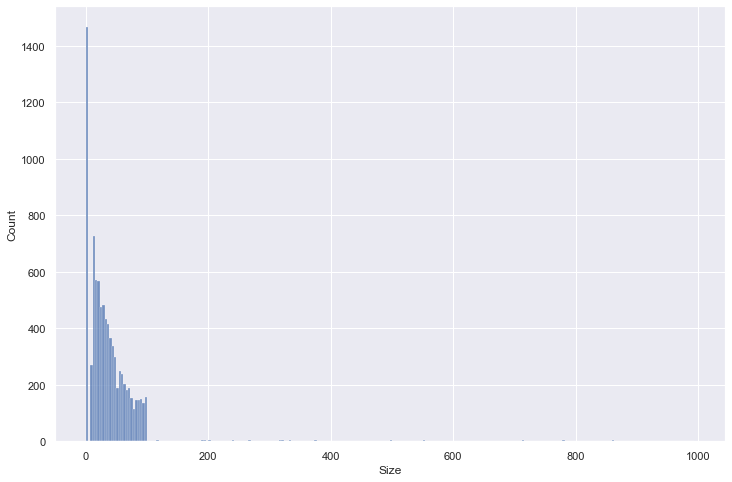

In [18]:
sns.histplot(df['Size'])
plt.show()

## Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

In [25]:
df[df.Price > 200].shape
#df.shape

(0, 12)

In [23]:
df.drop(df[df.Price > 200].index,inplace=True)

In [24]:
df.shape

(8856, 12)

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [31]:
df[df.Reviews > 20000000].shape

(30, 12)

In [32]:
df.drop(df[df.Reviews > 20000000].index,inplace=True)

In [33]:
df.shape

(8826, 12)

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [34]:
df['Installs'].describe()

count    8.826000e+03
mean     1.430752e+07
std      7.460168e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [39]:
df['Installs'].quantile([.1, .25, .5, .70, .90, .95, .99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95    100000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [40]:
df.drop(df[df['Installs'] > 10000000].index, inplace = True)

In [41]:
df.shape

(8106, 12)

## Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

In [42]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8106.000000,8.106000e+03,8106.000000,8.106000e+03,8106.000000
mean,4.170614,6.741883e+04,47.481989,2.045171e+06,0.330751
std,0.539584,1.958105e+05,89.918458,3.469617e+06,1.962243
min,1.000000,1.000000e+00,0.000000,5.000000e+00,0.000000
25%,4.000000,1.250000e+02,15.000000,1.000000e+04,0.000000
50%,4.300000,2.806500e+03,30.000000,1.000000e+05,0.000000
75%,4.500000,3.840800e+04,55.000000,1.000000e+06,0.000000
max,5.000000,3.093932e+06,994.000000,1.000000e+07,79.990000


<AxesSubplot:title={'center':'The effect of Rating on Apps based on Prices'}, xlabel='Rating', ylabel='Price'>

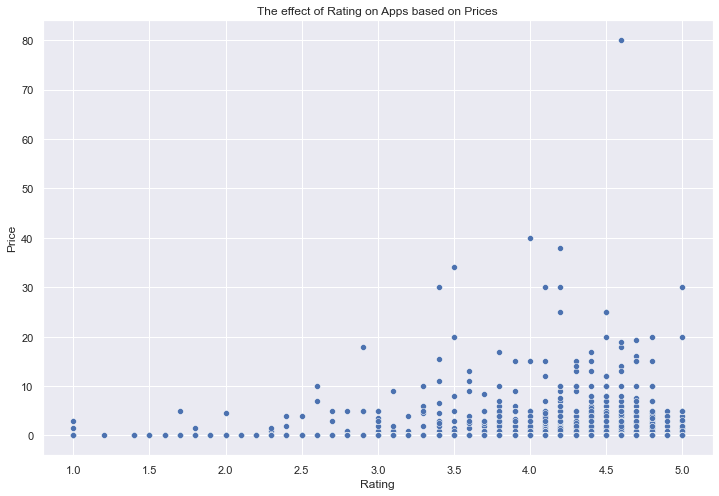

In [45]:
plt.title('The effect of Rating on Apps based on Prices')
sns.scatterplot(x='Rating',y='Price',data=df)

<Figure size 720x720 with 0 Axes>

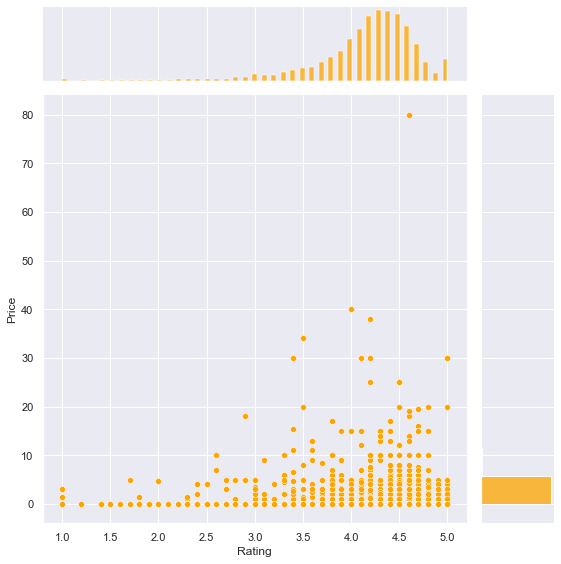

In [52]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Rating", y="Price",color = 'orange', data=df,height = 8);

Paid apps are higher ratings comapre to free apps.

<AxesSubplot:title={'center':'The effect of Rating on Apps based on Sizes'}, xlabel='Rating', ylabel='Size'>

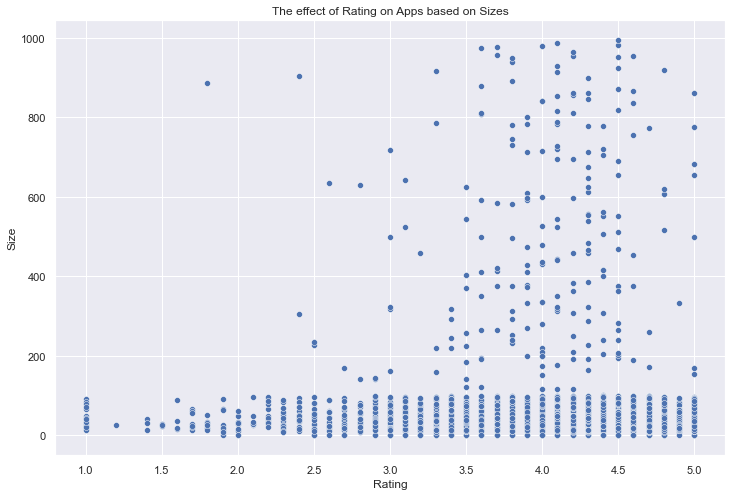

In [46]:
plt.title('The effect of Rating on Apps based on Sizes')
sns.scatterplot(x='Rating',y='Size',data=df)

<Figure size 720x720 with 0 Axes>

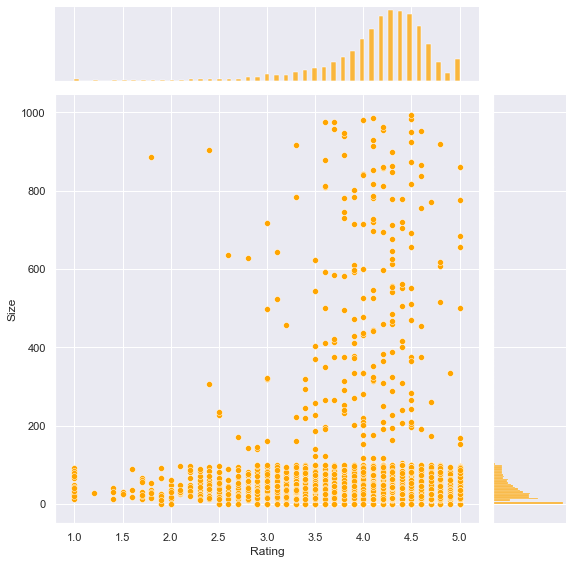

In [54]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Rating", y="Size",color = 'orange', data=df,height = 8);

#Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

Yes it is clear that heavier apps are rated better.

<AxesSubplot:title={'center':'The effect of Rating on Apps based on Reviews'}, xlabel='Rating', ylabel='Reviews'>

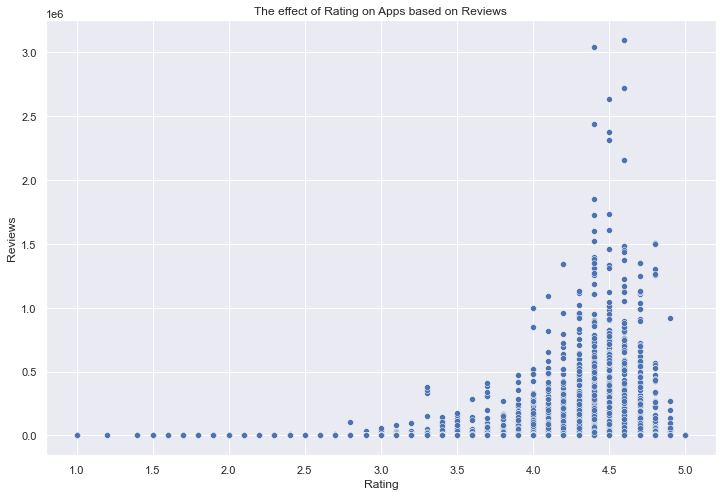

In [47]:
plt.title('The effect of Rating on Apps based on Reviews')
sns.scatterplot(x='Rating',y='Reviews',data=df)

<Figure size 720x720 with 0 Axes>

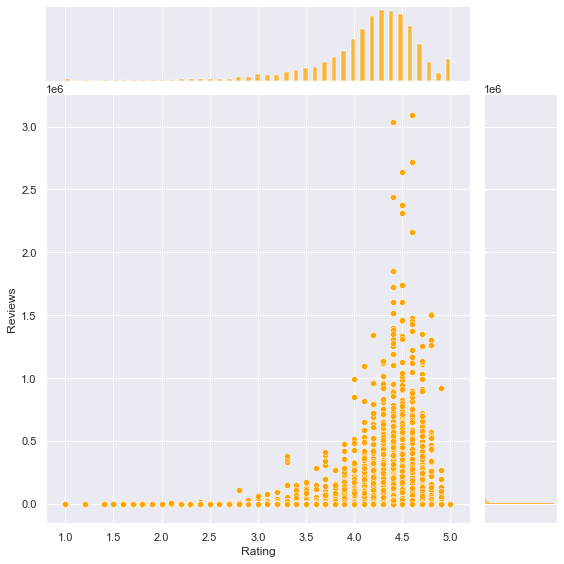

In [55]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Rating", y="Reviews",color = 'orange', data=df,height = 8);


More reviews makes app rating better.

<AxesSubplot:title={'center':'The effect of Rating on Apps based on Content Rating'}, xlabel='Rating', ylabel='Content_Rating'>

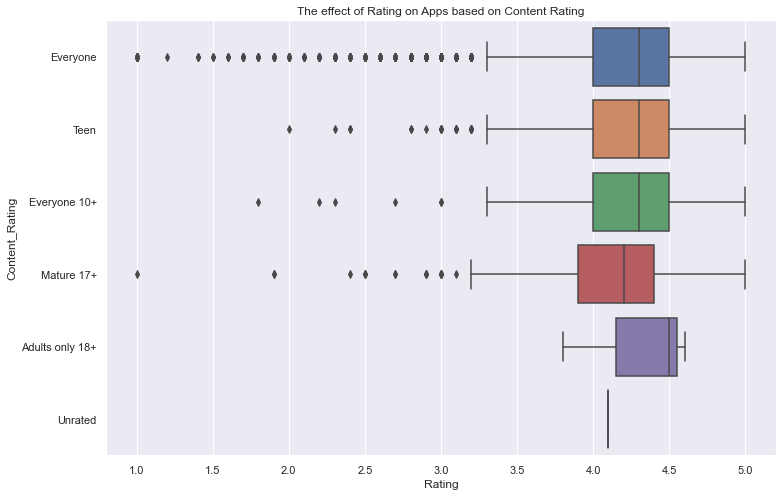

In [49]:
plt.title('The effect of Rating on Apps based on Content Rating')
sns.boxplot(x="Rating", y="Content_Rating", data=df)

Apps which are for everyone has more bad ratings compare to other sections as it has so much outliers value, while 18+ apps have better ratings.

<AxesSubplot:title={'center':'The effect of Rating on Apps based on Category'}, xlabel='Rating', ylabel='Category'>

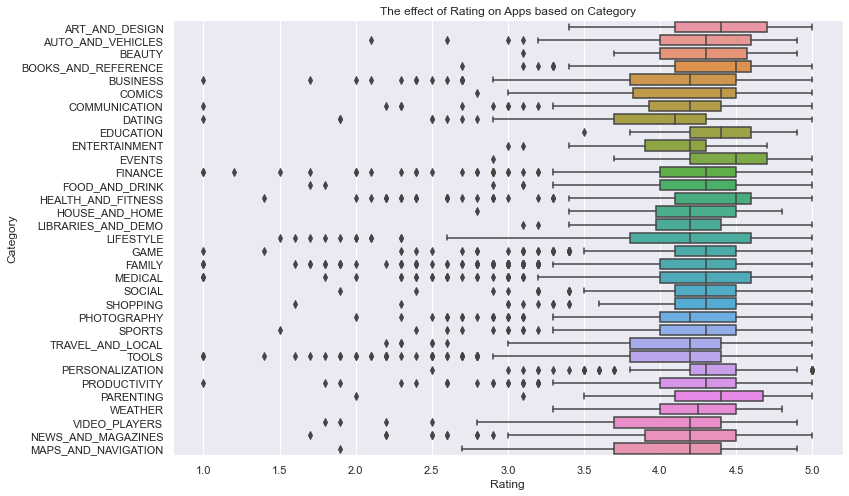

In [50]:
plt.title('The effect of Rating on Apps based on Category')
sns.boxplot(x="Rating", y="Category", data=df)

Events category has best ratings compare to others with less outliers.

## Data preprocessing

### For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [59]:
inp1 = df
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,56,50000,Free,0.0,Everyone,"March 26, 2017",1.0,2.3 and up


Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [60]:
inp1.skew()

C:\Users\zahed\AppData\Local\Temp\ipykernel_5140\3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.729512
Reviews      6.437456
Size         6.949391
Installs     1.615664
Price       15.810713
dtype: float64

In [70]:
reviewskew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

inp1['Reviews'].skew()


-1.8280563197647441

In [63]:
installsskew = np.log1p(inp1['Installs'])
inp1['Installs'] =installsskew 
installsskew.skew()

-0.47990009442754256

In [65]:
inp1['Installs'].skew()

-0.47990009442754256

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [76]:
inp1.drop(["Last_Updated","Current_Ver","Android_Ver"],axis=1,inplace=True)

In [77]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content_Rating
0,ART_AND_DESIGN,4.1,0.535668,19,9.210440,0.0,Everyone
1,ART_AND_DESIGN,3.9,0.560325,14,13.122365,0.0,Everyone
2,ART_AND_DESIGN,4.7,0.595637,87,15.424949,0.0,Everyone
4,ART_AND_DESIGN,4.3,0.560325,28,11.512935,0.0,Everyone
5,ART_AND_DESIGN,4.4,0.536487,56,10.819798,0.0,Everyone


Get dummy columns for Category and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [78]:
inp2 = inp1

Let's apply Dummy EnCoding on Column "Category"

In [79]:
#get unique values in Column "Category"
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [80]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content_Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,0.535668,19,9.210440,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,0.560325,14,13.122365,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,0.595637,87,15.424949,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,0.560325,28,11.512935,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,0.536487,56,10.819798,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's apply Dummy EnCoding on Column "Content_Rating"

In [81]:
inp2.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [82]:
inp2.Content_Rating = pd.Categorical(inp2.Content_Rating)

x = inp2[['Content_Rating']]
del inp2['Content_Rating']

dummies = pd.get_dummies(x, prefix = 'Content_Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,4.1,0.535668,19,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,0.560325,14,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,0.595637,87,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,0.560325,28,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,0.536487,56,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [83]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [86]:
d1 = inp2
X = d1.drop('Rating',axis=1)
y = d1['Rating']

## Separate the dataframes into X_train, y_train, X_test, and y_test.

In [87]:
Xtrain, Xtest, ytrain, ytest = tts(X,y, test_size=0.3, random_state=5)

## Model building

### Use linear regression as the technique

### Report the R2 on the train set

In [88]:
reg_all = LR()
reg_all.fit(Xtrain,ytrain)

LinearRegression()

In [89]:
R2_train = round(reg_all.score(Xtrain,ytrain),3)
print("The R2 value of the Training Set is : {}".format(R2_train))
#R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).
#The simplest r squared interpretation is how well the regression model fits the observed data values. Let us take an example to understand this. Consider a model where the R2 value is 70%. Here r squared meaning would be that the model explains 70% of the fitted data in the regression model. the higher the better.


The R2 value of the Training Set is : 0.042


### Make predictions on test set and report R2.

In [90]:
R2_test = round(reg_all.score(Xtest,ytest),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.03
